In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import statistics
import seaborn as sns


In [13]:

com = pd.read_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Comments_CSV\\cybersecurity_comments.csv")
sub = pd.read_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Submissions_CSV\\cybersecurity_submissions.csv")


data["day-month-yr"]= 0 
data["day-month-yr"] = data["Date"].dt.to_period("D")

data.to_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Sub_and_Com_CSV\\cybersecurity.csv")
print(data.Date[0])


data = pd.concat([sub, com])
data = data[data.Username != '[deleted]' ]

print(type(data.Date[0]))
data["Number of Posts by User"] = 0
data["Posts Per Thread"] = 0
new_df = data.groupby(['Username'])['Number of Posts by User'].agg('count').reset_index()
new_df = new_df.sort_values(by='Number of Posts by User', ascending=False)
average_numeber_posts_per_active_user = new_df['Number of Posts by User'].mean()
print("The average number of posts for active users is: " + str(average_numeber_posts_per_active_user)+ "\n")
number_of_users_posting = len(new_df)
new_df = new_df[new_df.Username != '[deleted]' ]
top_ten_users = new_df.head(10)
display(top_ten_users)

new_df = data.groupby(['Post ID'])['Posts Per Thread'].agg('count').reset_index()
new_df = new_df.sort_values(by='Posts Per Thread', ascending=False)

top_ten_threads = new_df.head(10)
display(top_ten_threads)
data['Date'] = pd.to_datetime(data['Date'])
print(data.Date[0])
data = data.sort_values(by='Date', ascending=False)
display(data)


0   2013-02-27 16:05:49
0   2012-06-20 15:34:39
Name: Date, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>
The average number of posts for active users is: 5.939121550496398



,Username,Number of Posts by User
4874,AutoModerator,19663
92845,tweedge,5341
47136,TrustmeImaConsultant,2679
64342,fabledparable,2552
74168,lawtechie,2285
33813,Oscar_Geare,1909
52591,alara_zero,1848
86512,securityaffairs,1832
81409,patrick-c-miller,1729
18157,Ghawblin,1599


,Post ID,Posts Per Thread
72254,sd4fmc,834
88745,xe3b49,646
89987,xto8hu,644
91621,ycr14q,588
86657,wrhq96,562
69134,rc31oa,524
59941,ohllk8,497
91262,y89aoy,489
75567,tbuk3d,444
75617,tcmylk,441


0   2012-06-20 15:34:39
0   2013-02-27 16:05:49
Name: Date, dtype: datetime64[ns]


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Post ID,Comment ID,Username,Body,Subreddit,Date,Score,Embedded URL,URL,Number of Posts by User,Posts Per Thread
542102,542102,542102,542102,542102,zzul5e,j2ftwjl,llusty1,I totally feel this,cybersecurity,2022-12-31 23:31:58,1,NaN,NaN,0,0
542101,542101,542101,542101,542101,zzghz0,j2fshug,-DarthPhoenix,**Buy professional liability insurance for err...,cybersecurity,2022-12-31 23:21:20,1,NaN,NaN,0,0
542100,542100,542100,542100,542100,zzul5e,j2fs3h0,Zyglow,I've been in information/computer/cyber securi...,cybersecurity,2022-12-31 23:18:18,4,NaN,NaN,0,0
542099,542099,542099,542099,542099,10013wv,j2frzcp,here_for_the_MAGICS,You mean the wiretap was listening??,cybersecurity,2022-12-31 23:17:27,2,NaN,NaN,0,0
542098,542098,542098,542098,542098,1006a40,j2frt3m,alara_zero,"Hi, we've analyzed your post with machine lear...",cybersecurity,2022-12-31 23:16:08,1,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3,3,3,3,139mut,139mut,RamiroMacias,NaN,cybersecurity,2012-11-15 15:26:13,3,http://reason.com/blog/2012/11/15/president-ob...,https://www.reddit.com//r/cybersecurity/commen...,0,0
4,4,4,4,4,138494,138494,antdude,NaN,cybersecurity,2012-11-14 21:06:16,1,http://www.computerworld.com/s/article/9233656...,https://www.reddit.com//r/cybersecurity/commen...,0,0
2,2,2,2,2,103l4f,103l4f,zachkremian,NaN,cybersecurity,2012-09-18 14:03:47,1,http://internetsecurity.itsecuritywatch.com/th...,https://www.reddit.com//r/cybersecurity/commen...,0,0
0,0,0,0,0,vcold,vcold,energysg,NaN,cybersecurity,2012-06-20 15:34:39,1,http://www.fiercesmartgrid.com/story/infograph...,https://www.reddit.com//r/cybersecurity/commen...,0,0


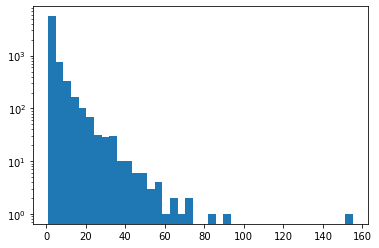

In [19]:
#CCDF of user posting frequency:X-axis: number of posts Y-axis: Percentage of users posting this many posts


users_posts ={}
for i, row in data.iterrows():
    if row["Post ID"] not in users_posts:
        users_posts[row["Post ID"]] = 1 
    else: 
        users_posts[row["Post ID"]] += 1
        
x = []
for key, val in users_posts.items():
    x.append(val)
plt.hist(x, 40)
#plt.xlim(0,100)
plt.yscale('log')
plt.show()
    

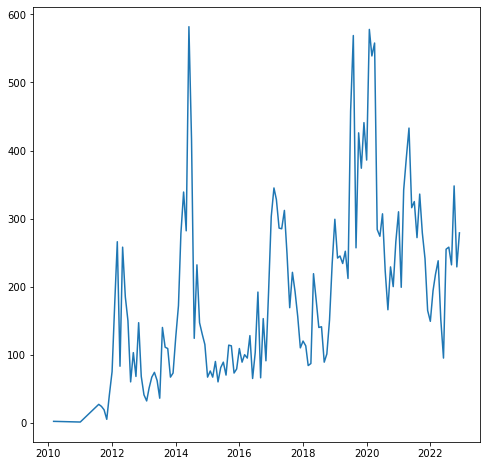

In [9]:
date_dict = {}
new_data = data 
new_data["mnth-yr"] = 0

new_data["mnth-yr"] = data["Date"].dt.to_period("M")


for i, row in new_data.iterrows():
    if row["mnth-yr"] not in date_dict:
        date_dict[row["mnth-yr"]]= 1 
    else: 
        date_dict[row["mnth-yr"]] += 1
        
x, y = [], []
for key, val in date_dict.items():
    x.append(pd.to_datetime((str(key.year) + "-" + str(key.month))))
    y.append(val)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y);

    

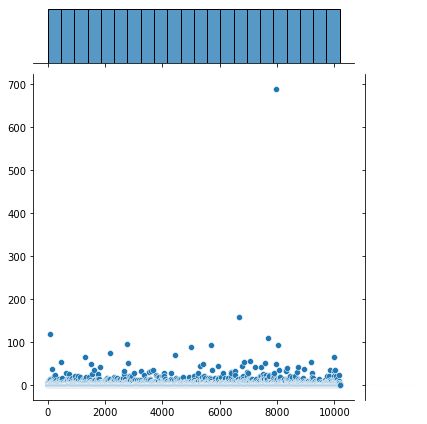

In [12]:
new_df = data.groupby(['Username'])['Number of Posts by User'].agg('count').reset_index()
col_1 = np.array(new_df['Number of Posts by User'])
col_3 = np.array(range(0, len(new_df['Number of Posts by User'])))

sns.jointplot(x=col_3, y=col_1)

,Post ID,Number of Unique Users
0,1000ado,3
1,10013wv,2
2,10016og,1
3,1001jqw,1
4,10022vb,1
...,...,...
96301,zzxv3b,1
96302,zzy5uz,1
96303,zzyf3w,13
96304,zzykro,6


,Number of Unique Users,Number of Threads with Unique users
0,1,41684
1,2,23326
2,3,7585
3,4,5355
4,5,3750
...,...,...
188,286,1
189,304,1
190,319,1
191,337,1


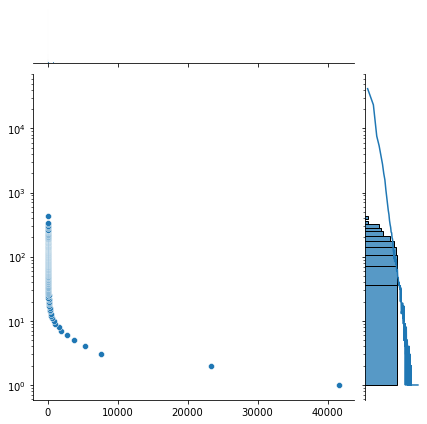

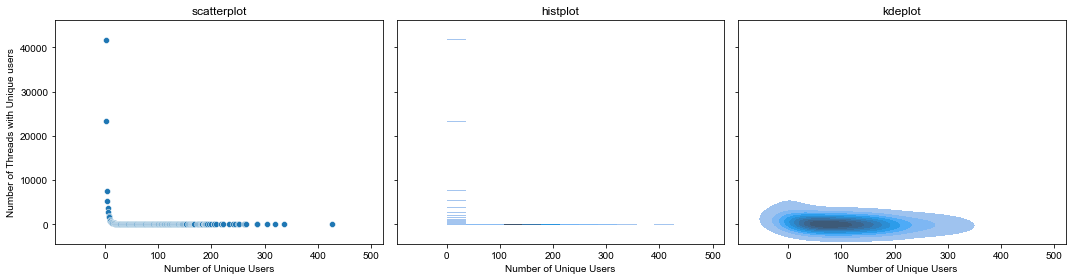

In [11]:
#X-axis: Unique users interacting in a thread, y-axis: # of threads that have this (histogram)
data['Number of Unique Users'] = 0
posts_per_thread = data.groupby(['Post ID','Username'])['Number of Unique Users'].agg('unique').reset_index()
posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Users'].agg('count').reset_index()
#posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Users'].agg('count').reset_index()




#posts_per_thread = posts_per_thread.sort_values(by='Number of Unique Users', ascending=True)

 
display(posts_per_thread)

#isplay(posts_per_thread.head(20))
data_dict = {}
posts_per_thread["Number of Threads with Unique users"]  = 0 
new_df = posts_per_thread.groupby(['Number of Unique Users'])['Number of Threads with Unique users'].agg('count').reset_index()
display(new_df)

new_df = new_df.astype({'Number of Threads with Unique users':'int'})
new_df = new_df.astype({'Number of Unique Users':'int'})
new_df = new_df.astype({'Number of Threads with Unique users':'int'})

col_1 = np.array(new_df["Number of Unique Users"])
col_3 = np.array(new_df['Number of Threads with Unique users'] ) 
sns.jointplot(x=col_3, y=col_1)


plt.loglog(col_1,col_3)
plt.show()

#plt.xscale('log')
#plt.yscale('log')                      

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4), sharex=True, sharey=True)

sns.set_style('darkgrid')
sns.scatterplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], ax=ax1)
sns.histplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], ax=ax2)
sns.kdeplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], fill=True, ax=ax3)

ax1.set_title('scatterplot')
ax2.set_title('histplot')
ax3.set_title('kdeplot')
plt.tight_layout()
plt.show()

    

In [10]:
data['Number of Unique Threads'] = 0

posts_per_thread = data.groupby(['Post ID'])['Number of Unique Threads'].agg('unique').reset_index()
posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Threads'].agg('count').reset_index()
#102152
display(posts_per_thread)

,Post ID,Number of Unique Threads
0,1000ado,1
1,10013wv,1
2,10016og,1
3,1001jqw,1
4,10022vb,1
...,...,...
96301,zzxv3b,1
96302,zzy5uz,1
96303,zzyf3w,1
96304,zzykro,1
